# Pymaceuticals Inc.
---

### Analysis
* Based on the scatterplot and linear regression model applied to weight vs. average tumor volume, there appears to be a strong positive correlation between a mouse's weight and their average tumor volume.
* Based on the boxplot of the four regimens of interest, infubinol appears to have an outlier value (Mouse ID: c326). This could imply that Mouse ID: c326 has some other factors affecting its tumor size beyond the infubinol treatments. 
* Based on the piecharts created for the ratio of mice participants in this study, the count of male/female mice appears to be relatively even. This could be a good basis for the results of the study being applicable to both male and female mice.

## Dependencies and starter code

In [93]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
# Used right join to append mouse metadata into the study result dataframe
merged_df = pd.merge(study_results,mouse_metadata,on='Mouse ID', how='right')
merged_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


## Summary statistics

In [94]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_df = pd.DataFrame([merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean(),
                           merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median(), 
                           merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std(), 
                           merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var(),
                           merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()], 
                           index=['Mean', 'Median', 'Std. dev', 'Variance', 'SEM'])
summary_df

Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Mean,40.675741,52.591172,52.884795,55.235638,54.331565,54.033581,52.322552,40.216745,54.233149,53.236507
Median,41.557809,51.776157,51.820584,53.698743,52.509285,52.288934,50.854632,40.673236,52.431737,51.818479
Std. dev,4.994774,6.268188,6.567243,8.279709,8.134708,7.821003,6.507770,4.846308,7.710419,6.966589
Variance,24.947764,39.290177,43.128684,68.553577,66.173479,61.168083,42.351070,23.486704,59.450562,48.533355
SEM,0.329346,0.469821,0.492236,0.603860,0.596466,0.581331,0.512884,0.320955,0.573111,0.516398


## Bar plots

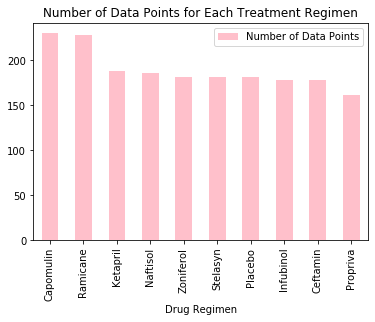

In [95]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

#create groupby object by drug regimen and counting the number of instances of Mouse ID; sort values in descending order for presentation
regimen_count = merged_df.groupby('Drug Regimen')['Mouse ID'].count().sort_values(ascending=False)

#move groupby object into dataframe
regimen_count_df = pd.DataFrame(regimen_count)

#create column with 'Number of Data Points' as label
regimen_count_df['Number of Data Points'] = regimen_count_df['Mouse ID']

#remove redundant column
del regimen_count_df['Mouse ID']

#use pandas .plot.bar to plot bar chart; color and title applied
regimen_count_df.plot.bar(color = 'pink', title = 'Number of Data Points for Each Treatment Regimen')

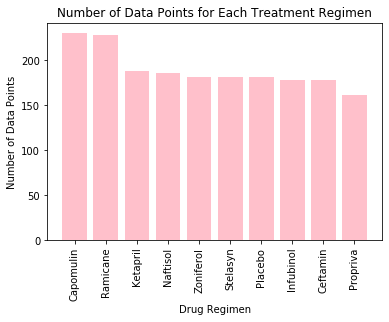

In [96]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

#use pyplot to plot barchart based on the dataframe created above('regimen_count')
plt.bar(regimen_count_df.index.values,regimen_count_df['Number of Data Points'].sort_values(ascending=False), color = 'pink')

#rotate xticks for presentation
plt.xticks(rotation='90')

#apply title
plt.title('Number of Data Points for Each Treatment Regimen')

#apply x and y labels for presentation
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')

#show
plt.show()

## Pie plots

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1cdccb90>],
      dtype=object)

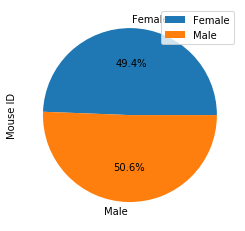

In [97]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#create groupby object and use to create dataframe for pie chart
sex_panda_count = merged_df.groupby('Sex')['Mouse ID'].count()
sex_panda_count_df = pd.DataFrame(sex_panda_count)

#use Pandas to plot pie chart and format autopct
sex_panda_count_df.plot.pie(subplots=True,autopct='%1.1f%%')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  # This is added back by InteractiveShellApp.init_path()


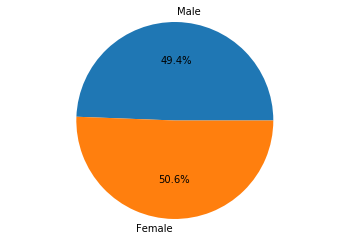

In [98]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#Create labels for pie chart
labels = ('Male', 'Female')

#create groupby object and use to create dataframe for pie chart
sex_count = merged_df.groupby('Sex')['Mouse ID'].count()
sex_count_df = pd.DataFrame(sex_count)

#Plot pie chart
plt.pie(sex_count_df, labels=labels,autopct='%1.1f%%')
plt.axis("equal")
plt.show()

## Quartiles, outliers and boxplots

In [99]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 

#groupby and application of .max() to identify final tumor volume
max_volume = merged_df.groupby('Mouse ID')['Tumor Volume (mm3)'].max()

#create dataframe from groupby object
max_volume_df = pd.DataFrame(max_volume)

#display dataframe
max_volume_df

,Tumor Volume (mm3)
Mouse ID,
a203,67.973419
a251,65.525743
a262,70.717621
a275,62.999356
a366,63.440686
...,...
z435,48.710661
z578,45.000000
z581,62.754451


In [100]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Start by getting the last (greatest) timepoint for each mouse

#groupby and apply .max() function to obtain last timepoint for each mouse
max_tumor = merged_df.groupby(["Mouse ID"]).max()

#reset index 
max_tumor = max_tumor.reset_index()

#display df
max_tumor

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,45.000000,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [101]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

#use .merge() to merge df with original dataframe
merged_data = max_tumor[['Mouse ID','Timepoint']].merge(merged_df,on=['Mouse ID','Timepoint'],how="left")

In [102]:
#Create dataframes for final tumor volume in the regimens of interest

capomulin = merged_data[merged_data['Drug Regimen']=='Capomulin']
ramicane = merged_data[merged_data['Drug Regimen']=='Ramicane']
infubinol = merged_data[merged_data['Drug Regimen']=='Infubinol']
ceftamin = merged_data[merged_data['Drug Regimen']=='Ceftamin']


In [103]:
# Quantitatively determine capomulin outliers, print relevant info

#identify quartiles
cap_quartiles = capomulin['Tumor Volume (mm3)'].quantile([.25,.5,.75])

#hold lower and upper quartiles in variables
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]

#calculate IQR
cap_iqr = cap_upperq-cap_lowerq

#calculate upper and lower bounds
cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)

#print summary information
print(f'The lower quartile of occupancy is {cap_lowerq}')
print(f'The upper quartile of occupancy is {cap_upperq}')
print(f'The interquartile range of occupancy is {cap_iqr}')
print(f'The median of occupancy is {cap_quartiles[.5]}')
print(f'Values below {cap_lower_bound} could be outliers.')
print(f'Values above {cap_upper_bound} could be outliers.')
print(f"Capomulin potential outliers: {capomulin.loc[(capomulin['Tumor Volume (mm3)'] < cap_lower_bound) | (capomulin['Tumor Volume (mm3)'] > cap_upper_bound)]}")

The lower quartile of occupancy is 32.37735684
The upper quartile of occupancy is 40.1592203
The interquartile range of occupancy is 7.781863460000004
The median of occupancy is 38.125164399999996
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
Capomulin potential outliers: Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []


In [104]:
# Quantitatively determine ramicane outliers, print relevant info

#identify quartiles and store in variable
ram_quartiles = ramicane['Tumor Volume (mm3)'].quantile([.25,.5,.75])

#hold lower and upper quartiles in variables
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]

#calculate IQR and store in variable
ram_iqr = ram_upperq-ram_lowerq

#calculate upper and lower bounds and store in variables
ram_lower_bound = ram_lowerq - (1.5*ram_iqr)
ram_upper_bound = ram_upperq + (1.5*ram_iqr)

#print summary info
print(f'The lower quartile of occupancy is {ram_lowerq}')
print(f'The upper quartile of occupancy is {ram_upperq}')
print(f'The interquartile range of occupancy is {ram_iqr}')
print(f'The median of occupancy is {ram_quartiles[.5]}')
print(f'Values below {ram_lower_bound} could be outliers.')
print(f'Values above {ram_upper_bound} could be outliers.')
print(f"Capomulin potential outliers: {ramicane.loc[(ramicane['Tumor Volume (mm3)'] < ram_lower_bound) | (ramicane['Tumor Volume (mm3)'] > ram_upper_bound)]}")

The lower quartile of occupancy is 31.56046955
The upper quartile of occupancy is 40.65900627
The interquartile range of occupancy is 9.098536719999998
The median of occupancy is 36.56165229
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
Capomulin potential outliers: Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []


In [105]:
# Quantitatively determine infubinol outliers, print relevant info

#identify quartiles and store in variable
inf_quartiles = infubinol['Tumor Volume (mm3)'].quantile([.25,.5,.75])

#hold lower and upper quartiles in variables
inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]

#calculate IQR and store in variable
inf_iqr = inf_upperq-inf_lowerq

#calculate upper and lower bounds and store in variables
inf_lower_bound = inf_lowerq - (1.5*inf_iqr)
inf_upper_bound = inf_upperq + (1.5*inf_iqr)

#print summary info
print(f'The lower quartile of occupancy is {inf_lowerq}')
print(f'The upper quartile of occupancy is {inf_upperq}')
print(f'The interquartile range of occupancy is {inf_iqr}')
print(f'The median of occupancy is {inf_quartiles[.5]}')
print(f'Values below {inf_lower_bound} could be outliers.')
print(f'Values above {inf_upper_bound} could be outliers.')
print(f"Capomulin potential outliers: {infubinol.loc[(infubinol['Tumor Volume (mm3)'] < inf_lower_bound) | (infubinol['Tumor Volume (mm3)'] > inf_upper_bound)]}")

The lower quartile of occupancy is 54.04860769
The upper quartile of occupancy is 65.52574285
The interquartile range of occupancy is 11.477135160000003
The median of occupancy is 60.16518046
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
Capomulin potential outliers:    Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
31     c326          5           36.321346                 0    Infubinol   

       Sex  Age_months  Weight (g)  
31  Female          18          25  


In [106]:
# Quantitatively determine ceftamin outliers

#identify quartiles and store in variable
cef_quartiles = ceftamin['Tumor Volume (mm3)'].quantile([.25,.5,.75])

#hold lower and upper quartiles in variables
cef_lowerq = cef_quartiles[0.25]
cef_upperq = cef_quartiles[0.75]

#calculate IQR and store in variable
cef_iqr = cef_upperq-cef_lowerq

#calculate upper and lower bounds and store in variables
cef_lower_bound = cef_lowerq - (1.5*cef_iqr)
cef_upper_bound = cef_upperq + (1.5*cef_iqr)

#print summary info
print(f'The lower quartile of occupancy is {cef_lowerq}')
print(f'The upper quartile of occupancy is {cef_upperq}')
print(f'The interquartile range of occupancy is {cef_iqr}')
print(f'The median of occupancy is {cef_quartiles[.5]}')
print(f'Values below {cef_lower_bound} could be outliers.')
print(f'Values above {cef_upper_bound} could be outliers.')
print(f"Capomulin potential outliers: {ceftamin.loc[(ceftamin['Tumor Volume (mm3)'] < cef_lower_bound) | (ceftamin['Tumor Volume (mm3)'] > cef_upper_bound)]}")

The lower quartile of occupancy is 48.72207785
The upper quartile of occupancy is 64.29983003
The interquartile range of occupancy is 15.577752179999997
The median of occupancy is 59.85195552
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.
Capomulin potential outliers: Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []


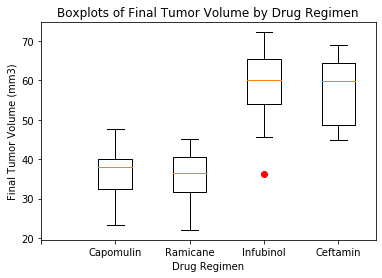

In [131]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#variable for boxplot using tumor volumes across the drug regimens
x = [capomulin['Tumor Volume (mm3)'],ramicane['Tumor Volume (mm3)'],infubinol['Tumor Volume (mm3)'],ceftamin['Tumor Volume (mm3)']];

#variable for labels for boxplot
xlabel = ('','Capomulin', 'Ramicane','Infubinol','Ceftamin')

#plot boxplot using created variables, flag outlier with red coloring
plt.boxplot(x,sym='red')

#clean-up presentation
plt.title("Boxplots of Final Tumor Volume by Drug Regimen")
plt.xticks(np.arange(5),labels = xlabel)
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')

#add grid and show
plt.show()

## Line and scatter plots

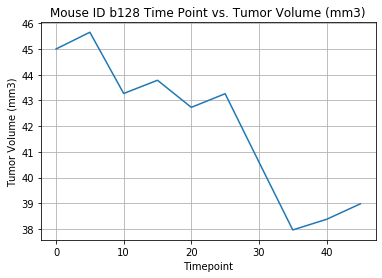

In [132]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#create dataframe for Mouse ID b128 (participant in Capomulin drug regimen)
b128 = merged_df[merged_df["Mouse ID"] == 'b128']
b128

#Create line plot and label / title
plt.plot(b128['Timepoint'],b128['Tumor Volume (mm3)'])
plt.title("Mouse ID b128 Time Point vs. Tumor Volume (mm3)")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

#add grid and show
plt.grid()
plt.show()

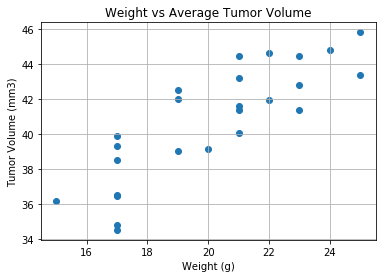

In [133]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

#1 - create restricted dataframe including only Capomulin participants
merged_df_cap = merged_df[merged_df['Drug Regimen'] == 'Capomulin']

#2 - groupby mouse to get average tumor volume using .mean()
groupedmice_avg = merged_df_cap.groupby(['Mouse ID']).mean()

#3 - scatter on average weight vs tumor volume
plt.scatter(groupedmice_avg['Weight (g)'], groupedmice_avg['Tumor Volume (mm3)'])

#4 - clean-up presentation and show

plt.grid()
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Weight vs Average Tumor Volume')
plt.show()

The correlation between mouse weight and the average tumor volume is 0.8419363424694717.


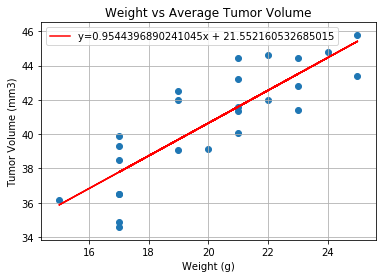

In [135]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

#1 - Pearson R function for correlation and corresponding print function.
pearson_r = st.pearsonr(groupedmice_avg['Weight (g)'], groupedmice_avg['Tumor Volume (mm3)'])
print(f'The correlation between mouse weight and the average tumor volume is {pearson_r[0]}.')

#2 - Linear regression function 
lin_regress = st.linregress(groupedmice_avg['Weight (g)'], groupedmice_avg['Tumor Volume (mm3)'])

#3 - define line and plot
line_regression = groupedmice_avg['Weight (g)']*lin_regress[0]+lin_regress[1]
plt.plot(groupedmice_avg['Weight (g)'],line_regression,color = 'red',label=(f'y={lin_regress[0]}x + {lin_regress[1]}'))

#4 - add legend to show line equation to graph for presentation
plt.legend(loc='upper left')

#5 - rescatter from the above cell
plt.scatter(groupedmice_avg['Weight (g)'], groupedmice_avg['Tumor Volume (mm3)'])

#6 - clean-up presentation and show
plt.grid()
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Weight vs Average Tumor Volume')
plt.show()